In [1]:
library(mlbench)
library(caret)

Loading required package: lattice
Loading required package: ggplot2


In [2]:
data(BreastCancer)

In [3]:
head(BreastCancer)

Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
1000025,5,1,1,1,2,1,3,1,1,benign
1002945,5,4,4,5,7,10,3,2,1,benign
1015425,3,1,1,1,2,2,3,1,1,benign
1016277,6,8,8,1,3,4,3,7,1,benign
1017023,4,1,1,3,2,1,3,1,1,benign
1017122,8,10,10,8,7,10,9,7,1,malignant


In [4]:
breast <- data.frame(CT = as.numeric(BreastCancer$Cl.thickness),
                     MA = as.numeric(BreastCancer$Marg.adhesion),
                     BC = as.numeric(BreastCancer$Bl.cromatin),
                     Class = BreastCancer$Class)
head(breast)

CT,MA,BC,Class
5,1,3,benign
5,5,3,benign
3,1,3,benign
6,1,3,benign
4,3,3,benign
8,8,9,malignant


In [5]:
set.seed(232)
ordem <- sample(1:nrow(breast))
breast_aj <- breast[ordem[1:500],]              ### Base de ajuste.
breast_pred <- breast[ordem[501:nrow(breast)],] ### Base de validação
ajuste <- glm(Class~CT+MA+BC, data = breast_aj, family = binomial)
summary(ajuste)


Call:
glm(formula = Class ~ CT + MA + BC, family = binomial, data = breast_aj)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.5333  -0.1925  -0.0702   0.0367   2.4677  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -9.9033     1.0396  -9.526  < 2e-16 ***
CT            0.9118     0.1268   7.193 6.34e-13 ***
MA            0.4917     0.1078   4.562 5.07e-06 ***
BC            0.8925     0.1460   6.113 9.75e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 636.98  on 499  degrees of freedom
Residual deviance: 129.33  on 496  degrees of freedom
AIC: 137.33

Number of Fisher Scoring iterations: 7


In [6]:
preds <- predict(ajuste, newdata = breast_pred, type = 'response')
t1 <- table(preds < 0.5, breast_pred$Class)
dimnames(t1)[[1]] <- c('Teste positivo', 'Teste negativo')
dimnames(t1)[[2]] <- c('Tumor benigno', 'Tumor maligno')
t1

                
                 Tumor benigno Tumor maligno
  Teste positivo             3            64
  Teste negativo           122            10

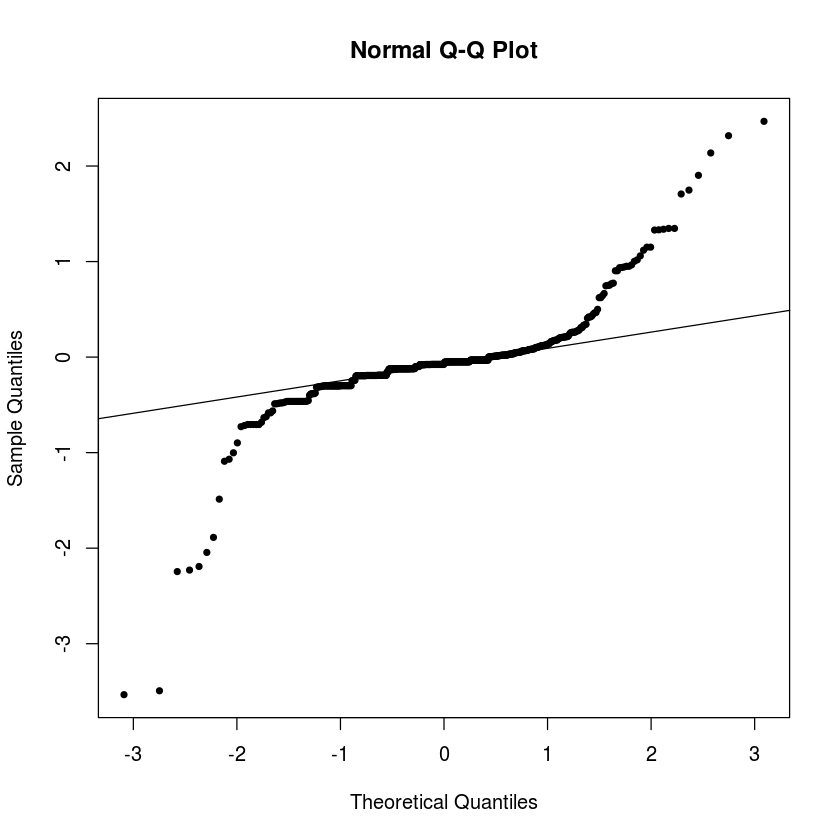

In [7]:
qqnorm(resid(ajuste), pch = 20)
qqline(resid(ajuste))

# 1) d

In [8]:
exp(ajuste$coefficients[2])

CT 
2.488782

# 2) c

In [9]:
predict(ajuste, data.frame(CT=4, MA=4, BC=5), type = 'response')

1 
0.5432091

# 3) b

In [10]:
confint(ajuste)

Waiting for profiling to be done...


,2.5 %,97.5 %
(Intercept),-12.1885168,-8.0776985
CT,0.6843475,1.1852805
MA,0.2927559,0.7201705
BC,0.6255084,1.2015022


# 4) b

In [11]:
levels(breast_pred$Class) <- c(0, 1)
threshold=0.5
predicted_values<-ifelse(predict(ajuste, newdata=breast_pred, type="response")>threshold,1,0)
actual_values<-breast_pred$Class
conf_matrix<-table(predicted_values,actual_values)

In [12]:
sensitivity(conf_matrix)

[1] 0.976

In [13]:
specificity(conf_matrix)

[1] 0.8648649

# 5) d